In [2]:
import uclchem, os, constants
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [15]:
folder = '/data2/gsampsonolalde/LEAPS-2024/Grid/2024-07-01_{}/{}/'
li=[f for f in os.listdir(folder.format('124848', constants.PHASE2)) if 'startcollapse' not in f]
df_sh = pd.concat([uclchem.analysis.read_output_file(folder.format('124848', constants.PHASE2)+gg) for gg in li])
li=[f for f in os.listdir(folder.format('134429', constants.PHASE2)) if 'startcollapse' not in f]
df_hc = pd.concat([uclchem.analysis.read_output_file(folder.format('134429', constants.PHASE2)+gg) for gg in li])
hydrogen=['H', '#H', 'H+', '@H', 'H2', '#H2', 'H2+', '@H2']
species=['#CH3OH', 'CH3OH', '@CH3OH', '#SIO', 'SIO', '@SIO']

In [16]:
# df['nH2'] = df['H2']+df['#H2']+df['H2+']+df['@H2']
df_sh= df_sh.loc[:,['Time', 'Density', 'gasTemp', 'av', 'zeta']+species]
df_hc= df_hc.loc[:,['Time', 'Density', 'gasTemp', 'av', 'zeta']+species]

## Functions

In [80]:
def scatterPlot(df, species, physVars):

    fig, axs = plt.subplots(len(species), len(physVars), figsize=(22, 20))
    fig.subplots_adjust(wspace=0.3, hspace=0.3)
    color = [plt.cm.viridis(i) for i in np.linspace(0, 1, len(species))]

    for i in range(len(species)):
        for j in range(len(physVars)):
            ax=axs[i][j]
            ax.scatter(df[species[i]], df[physVars[j]], s=3, c=color[i])
            ax.set_xlabel(df[species[i]].name)
            ax.set_ylabel(df[physVars[j]].name)

    # axs[0][0].legend(ncols=len(species), loc='upper left', mode='expand')
    # axs[0][1].get_legend().remove()
    # axs[1][0].legend(['Density', 'gasTemp', 'av'], ncols=3,loc='upper left')
    # axs[1][1].set_xscale('log')
    # axs[1][1].set_yscale('log')

    # plt.savefig(folder.format('scatterPlots')+runDict[2]+'.png', bbox_inches='tight')
    plt.show()

# Shock

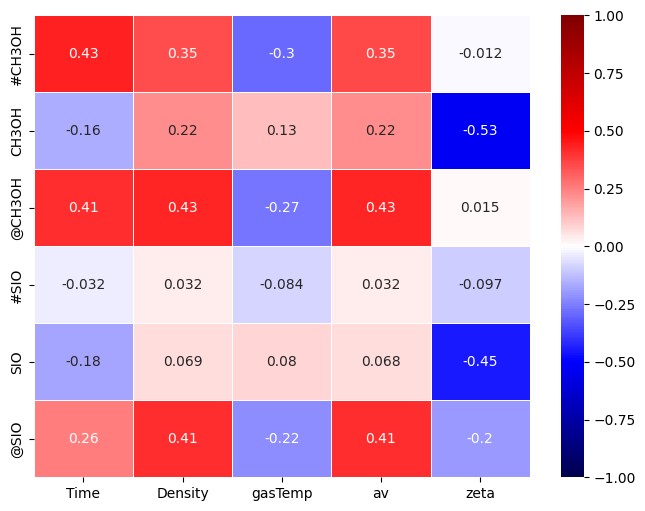

In [26]:
cor = df_sh.corr()
barrera=0

cor=cor[cor.abs().ge(barrera)].loc[:,['Time','Density','gasTemp','av','zeta']][5:].dropna(how='all')

plt.figure(figsize=(8, 6))
ax = sns.heatmap(cor, vmin=-1, vmax=1, annot=True, cmap="seismic", linewidths=.5)

/var/tmp/gsampsonolalde/ipykernel_763124/715383069.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(df[species[i]], df[physVars[j]], s=3, c=color[i])


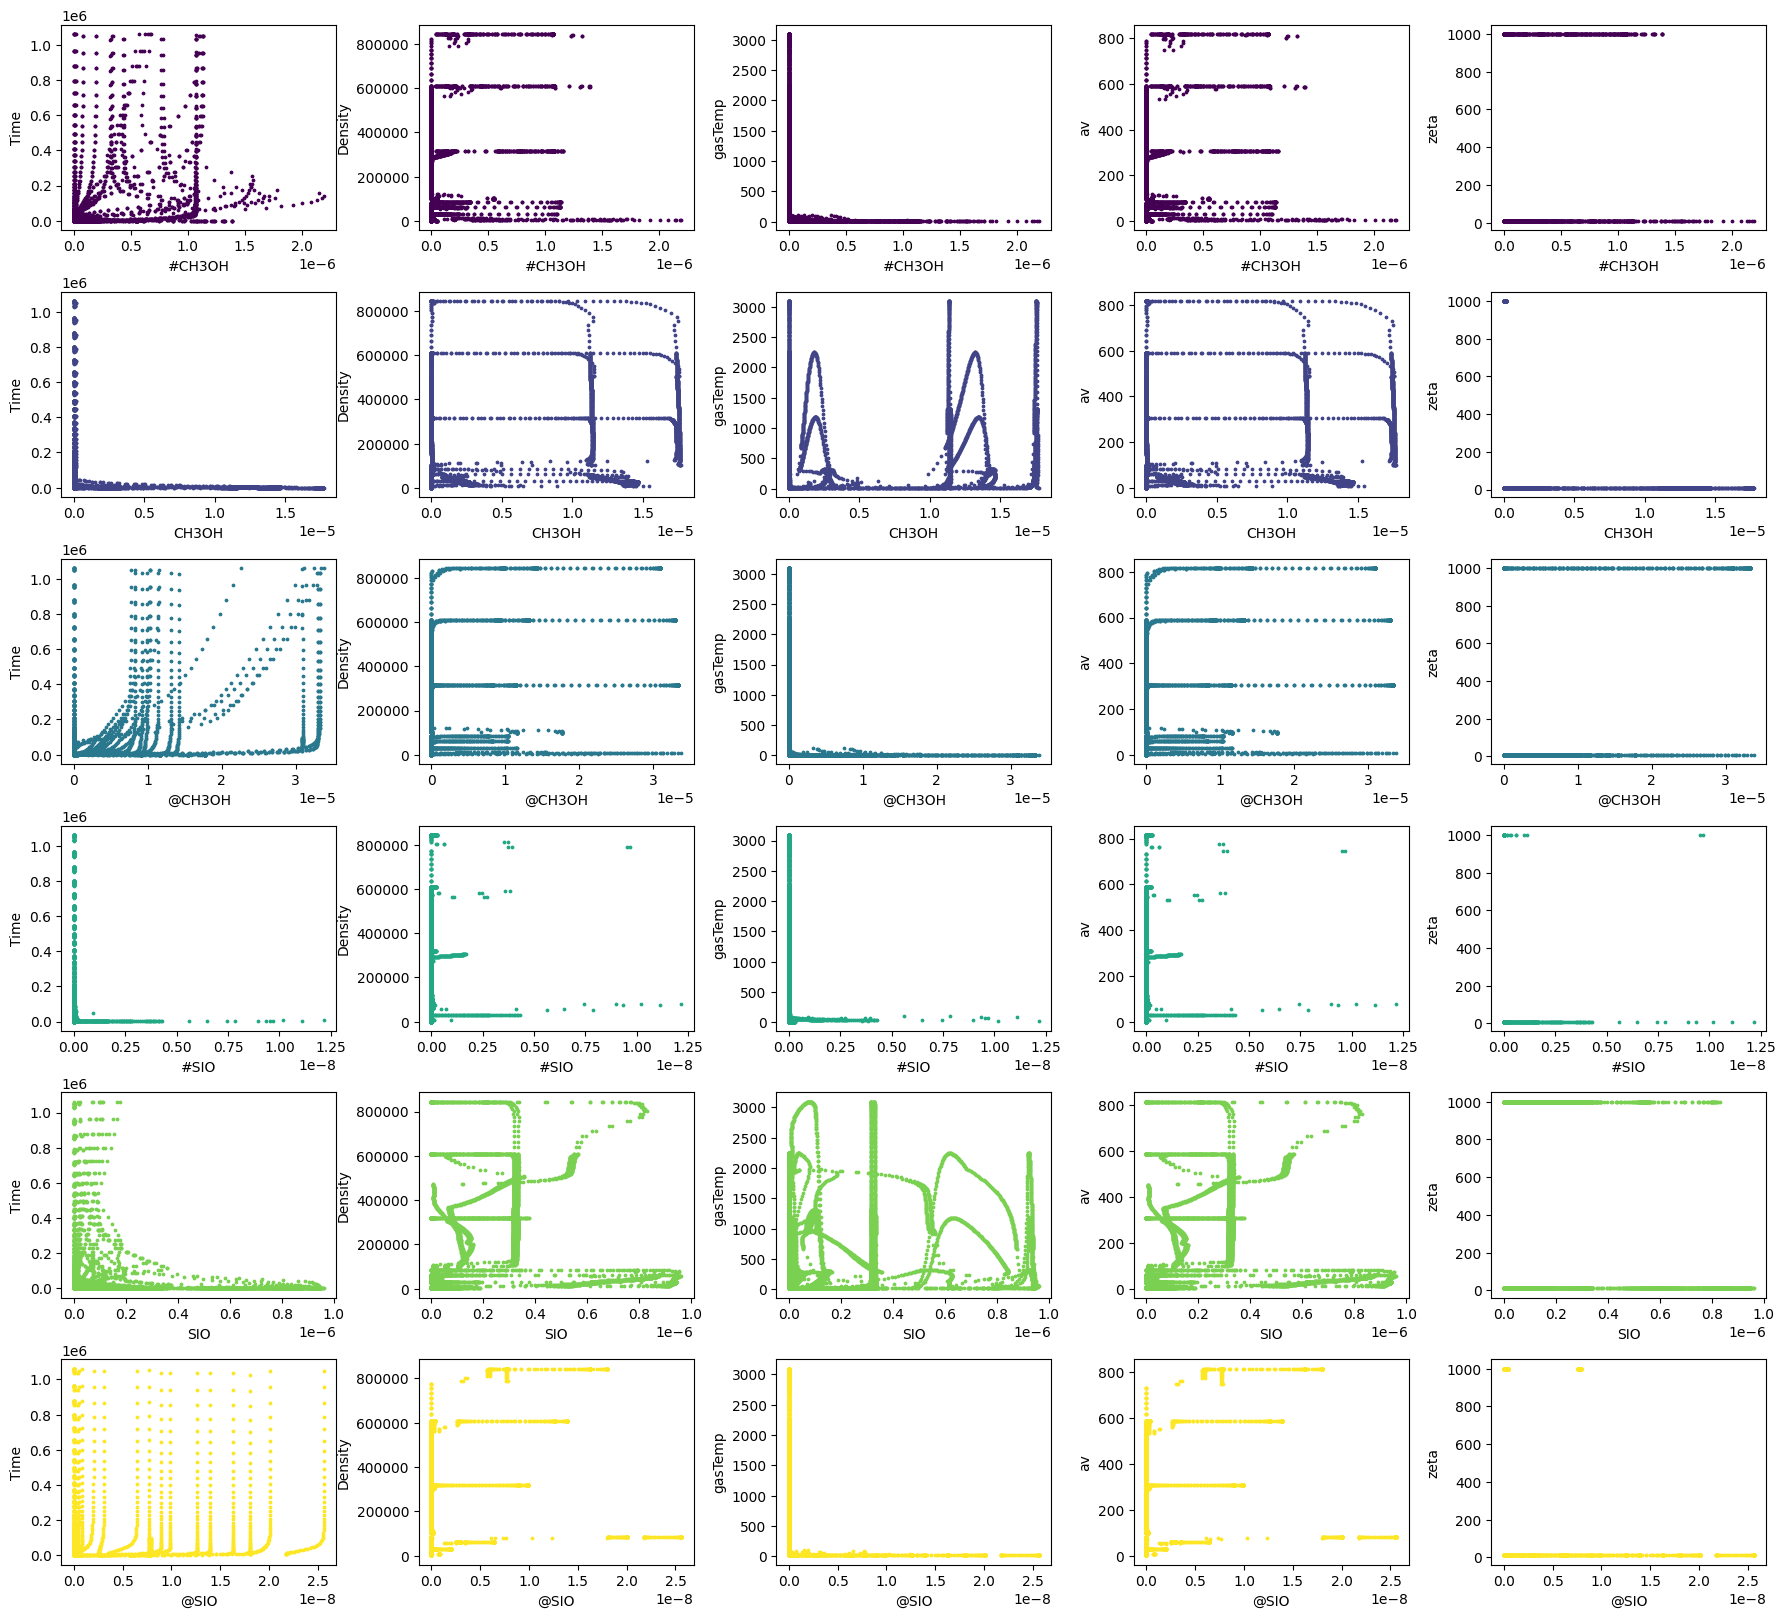

In [84]:
scatterPlot(df_sh, species, ['Time', 'Density', 'gasTemp', 'av', 'zeta'])

# Hot Core

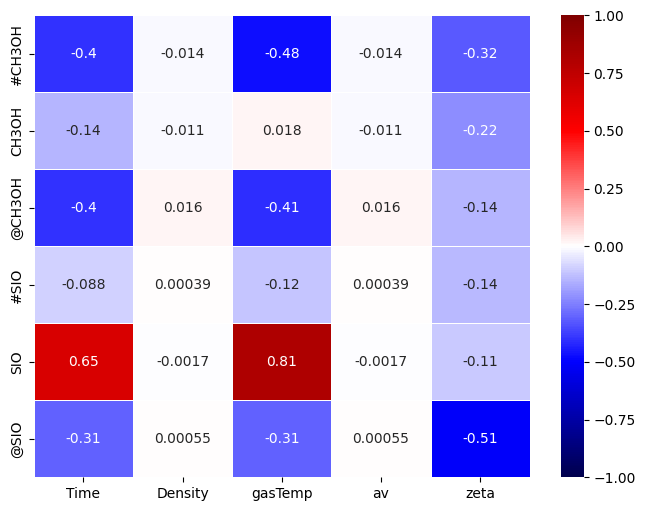

In [25]:
cor = df_hc.corr()
barrera=0

cor=cor[cor.abs().ge(barrera)].loc[:,['Time','Density','gasTemp','av','zeta']][5:].dropna(how='all')

plt.figure(figsize=(8, 6))
ax = sns.heatmap(cor, vmin=-1, vmax=1, annot=True, cmap="seismic", linewidths=.5)

/var/tmp/gsampsonolalde/ipykernel_763124/715383069.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(df[species[i]], df[physVars[j]], s=3, c=color[i])


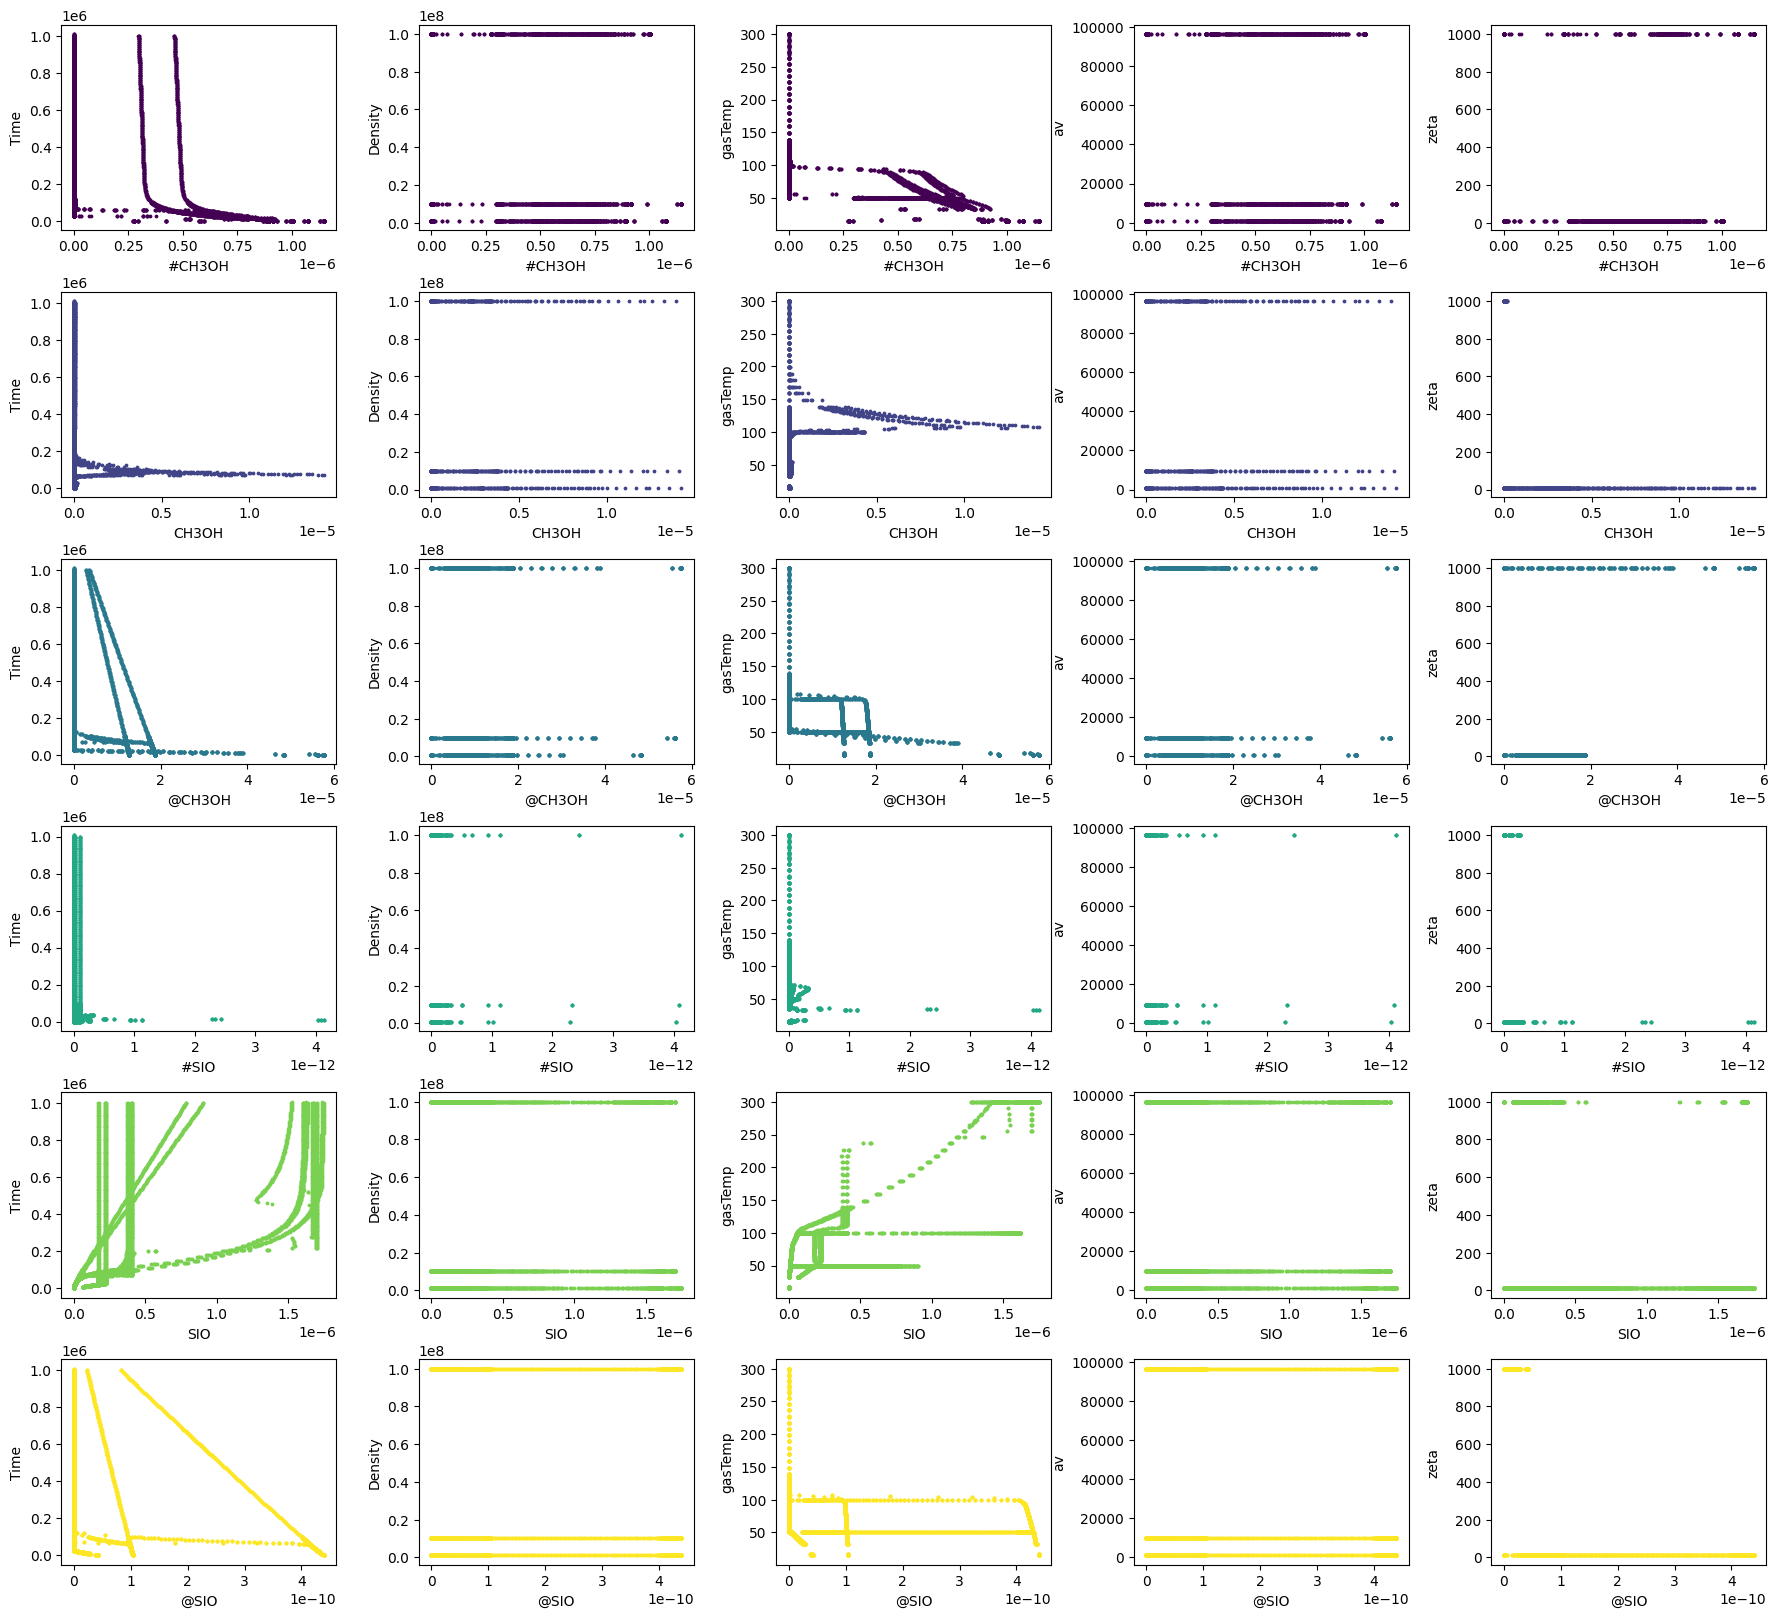

In [83]:
scatterPlot(df_hc, species, ['Time', 'Density', 'gasTemp', 'av', 'zeta'])

# misc

/var/tmp/gsampsonolalde/ipykernel_763124/715383069.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(df[species[i]], df[physVars[j]], s=3, c=color[i])


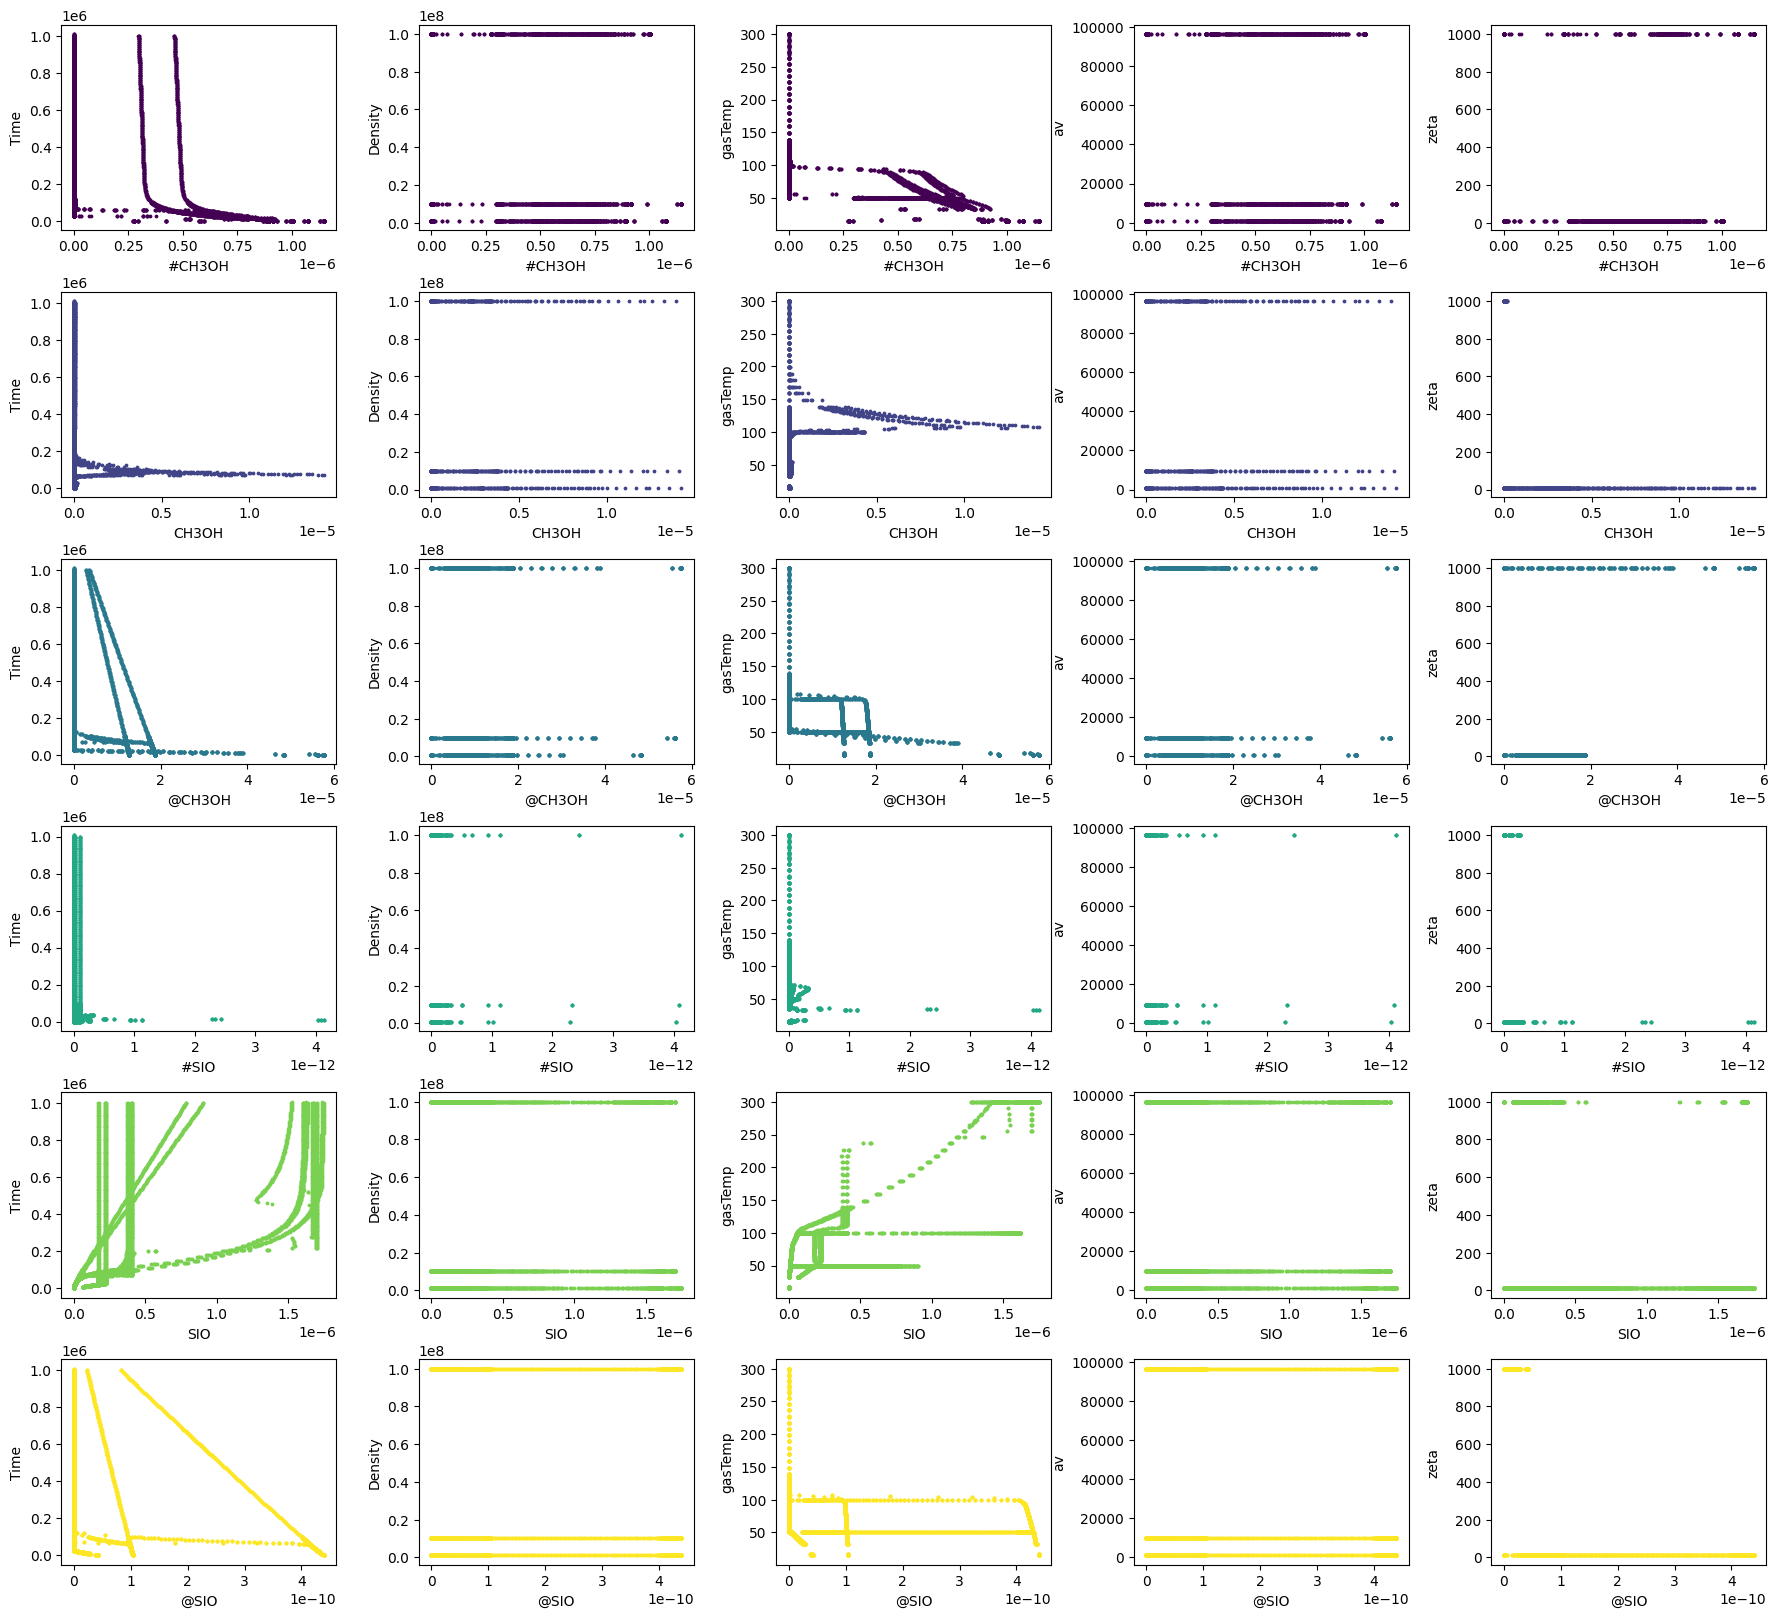

In [81]:
scatterPlot(df_hc, species, ['Time', 'Density', 'gasTemp', 'av', 'zeta'])